In [1]:
# papermill parameters
zona = 31
ruta = "/Volumes/Juanjo_4TB/Disco_4T/Master_Inteligencia_Artificial/Curso_2024_25/01_Python_para_Inteligencia_Artificial/Estudio/TFM"


In [2]:
# Parameters
zona = 31
ruta = "/Volumes/Juanjo_4TB/Disco_4T/Master_Inteligencia_Artificial/Curso_2024_25/01_Python_para_Inteligencia_Artificial/Estudio/TFM"


### Importa las librerias

In [3]:

import sys
import os

# Añadir la carpeta raíz del proyecto al sys.path
sys.path.append(os.path.abspath(".."))

import importlib
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import src.utilidades as uti
import src.graficos as gra
import src.parametros_sismicos as par

from shapely.geometry import Point

importlib.reload(uti)
importlib.reload(par)
importlib.reload(gra)

<module 'src.graficos' from '/Volumes/Juanjo_4TB/Disco_4T/Master_Inteligencia_Artificial/Curso_2024_25/01_Python_para_Inteligencia_Artificial/Estudio/TFM/src/graficos.py'>

### Lectura del Dataframe

In [4]:
# Leer el DataFrame guardado

filename = f"datos_zona_{zona}.pkl"
output_file=ruta+"/pkl_files/"+filename

gdf_2002 = pd.read_pickle(output_file)

gdf_2002.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1930 entries, 20306 to 141437
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Evento        1930 non-null   object        
 1   Latitud       1930 non-null   float64       
 2   Longitud      1930 non-null   float64       
 3   Prof_Km       1930 non-null   float64       
 4   Inten         1930 non-null   object        
 5   Mag           1930 non-null   float64       
 6   Tipo_Mag      1930 non-null   Int64         
 7   Localizacion  1930 non-null   object        
 8   FechaHora     1930 non-null   datetime64[ns]
 9   Mag_mbLgL     1930 non-null   float64       
 10  geometry      1930 non-null   geometry      
 11  Zona_ID       1930 non-null   float64       
dtypes: Int64(1), datetime64[ns](1), float64(6), geometry(1), object(3)
memory usage: 197.9+ KB


## CARACTERÍSTICAS PARAMÉTRICAS

### 1. Parámetros de la ley de Gutenberg–Richter (GR)

In [5]:

# Parámetros a y b para todo el catálogo
# Columna constante en todo el dataframe
gdf_2002_1_global,parametros_GR=uti.gutemberg_richter(gdf_2002, col_mag="Mag_mbLgL", min_mag=None)

print(parametros_GR)

# Evolución de los parámetros a y b (ventanas de 50 eventos)
gdf_2002_1 = par.gutemberg_richter_ventana(gdf_2002, col_mag="Mag_mbLgL", n_eventos=50)

gdf_2002_1.tail(15)

{'a_lsq_global': 4.3494806612934145, 'b_lsq_global': 0.8525728944089911, 'a_mlk_global': 3.4645715095643324, 'b_mlk_global': 0.35802840111311734}


,Evento,Latitud,Longitud,Prof_Km,Inten,Mag,Tipo_Mag,Localizacion,FechaHora,Mag_mbLgL,geometry,Zona_ID,a_lsq,b_lsq,a_mlk,b_mlk
141002,es2025pfqyu,38.9751,-0.1623,12.0,,1.4,4,NW DAIMÚS.V,2025-08-05 12:10:08,1.4,POINT (-0.1623 38.9751),31.0,2.823383,0.951868,2.152541,0.566964
141067,es2025plgxs,38.5350,-0.6970,10.0,,1.9,4,SW CASTALLA.A,2025-08-08 13:54:13,1.9,POINT (-0.697 38.535),31.0,2.842291,0.970538,2.158541,0.574464
141102,es2025ppmhp,39.0906,-0.5799,6.0,II,2.2,4,NE ANTELLA.V,2025-08-10 21:08:44,2.2,POINT (-0.5799 39.0906),31.0,2.841546,0.960088,2.150185,0.564019
141120,es2025priuq,39.1181,-0.5989,7.0,,1.2,4,SW TOUS.V,2025-08-11 21:38:43,1.2,POINT (-0.5989 39.1181),31.0,2.798270,0.923744,2.142128,0.553947
141199,es2025qaodb,38.7395,-0.2237,11.0,,1.4,4,NE FAMORCA.A,2025-08-16 22:31:57,1.4,POINT (-0.2237 38.7395),31.0,2.782601,0.920328,2.147853,0.561104
141224,es2025qcpng,38.5319,-0.7445,6.0,,1.2,4,NE PETRER.A,2025-08-18 01:30:09,1.2,POINT (-0.7445 38.5319),31.0,2.811724,0.934300,2.144400,0.556788
141231,es2025qcwen,38.9934,-0.6463,2.0,,1.5,4,S ANNA.V,2025-08-18 04:52:32,1.5,POINT (-0.6463 38.9934),31.0,2.796326,0.930701,2.150185,0.564019
141237,es2025qdddm,39.0919,-0.5935,4.0,II,1.7,4,N ANTELLA.V,2025-08-18 08:23:04,1.7,POINT (-0.5935 39.0919),31.0,2.794902,0.929726,2.149016,0.562558
141265,es2025qginq,39.1433,-0.6815,3.0,,1.3,4,NE NAVARRÉS.V,2025-08-20 02:30:24,1.3,POINT (-0.6815 39.1433),31.0,2.809120,0.941990,2.151360,0.565488
141300,es2025qjioj,39.0934,-0.5990,6.0,II,1.9,4,NW ANTELLA.V,2025-08-21 17:55:12,1.9,POINT (-0.599 39.0934),31.0,2.799285,0.939727,2.154922,0.569940


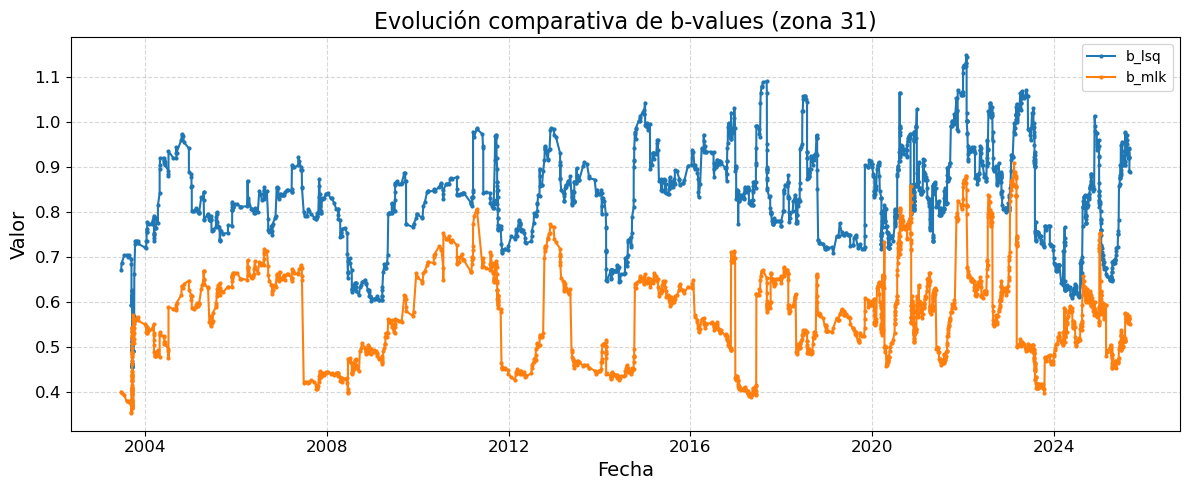

In [6]:
# Comparar evolución de b_lsq y b_mlk

filename = f"Evolución comparativa de b-values (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_1, 
   fecha_col="FechaHora", 
   param_cols=["b_lsq", "b_mlk"], 
   output_file=output_file,
   titulo=filename
   
)

### 2. Tasa media de liberación de energía de Benioff

In [7]:
gdf_2002_2 = par.calcular_tasa_benioff_ventana_rapida(
    gdf_2002_1,
    col_mag="Mag_mbLgL",
    fecha_col="FechaHora",
    T=1.0  # ventana de 1 año
)

gdf_2002_2 .head()

,Evento,Latitud,Longitud,Prof_Km,Inten,Mag,Tipo_Mag,Localizacion,FechaHora,Mag_mbLgL,geometry,Zona_ID,a_lsq,b_lsq,a_mlk,b_mlk,Tasa_Benioff
20306,300738,38.6599,-0.6962,0.0,,2.2,2,NW ONIL.A,2002-01-06 03:54:34,0.871837,POINT (-0.6962 38.6599),31.0,NaN,NaN,NaN,NaN,0.000000
20338,302041,39.3502,-0.8019,10.8,,2.2,2,SW MACASTRE.V,2002-01-13 05:08:34,0.871837,POINT (-0.8019 39.3502),31.0,NaN,NaN,NaN,NaN,1132.081129
20344,302312,39.3549,-0.7561,10.1,,2.1,2,SE MACASTRE.V,2002-01-13 20:04:13,0.747143,POINT (-0.7561 39.3549),31.0,NaN,NaN,NaN,NaN,1601.004486
20359,303209,38.4062,-0.0236,7.1,,2.5,2,MEDITERRÁNEO-CABO DE PALOS,2002-01-18 07:10:46,1.245918,POINT (-0.0236 38.4062),31.0,NaN,NaN,NaN,NaN,1842.918410
20398,304301,38.8689,-0.7099,7.4,,2.6,2,E MOGENTE/MOIXENT.V,2002-01-23 09:11:36,1.370612,POINT (-0.7099 38.8689),31.0,NaN,NaN,NaN,NaN,2839.300356


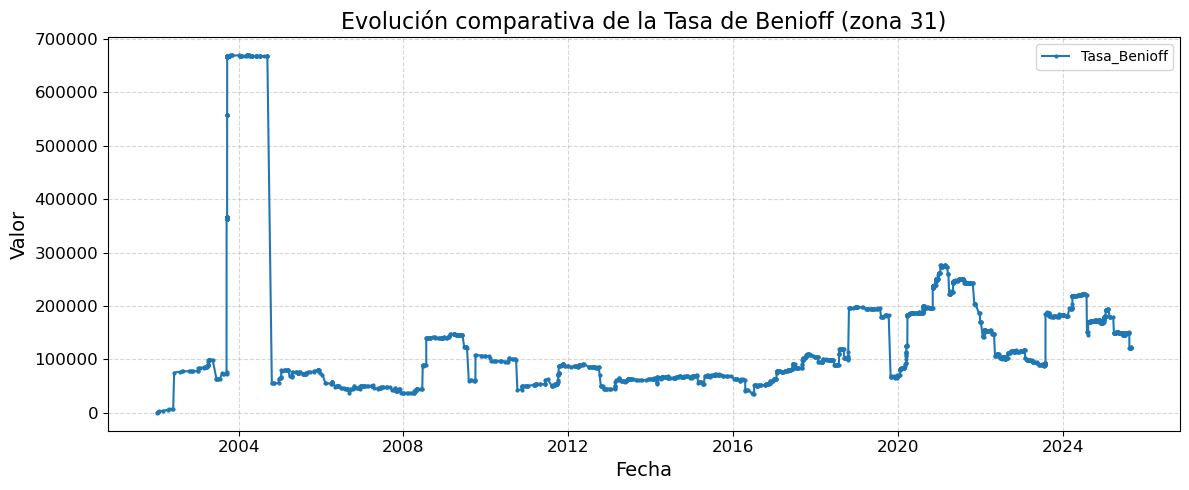

In [8]:
# Comparar evolución de la Tasa de Benioff
filename = f"Evolución comparativa de la Tasa de Benioff (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_2, 
   fecha_col="FechaHora", 
   param_cols=["Tasa_Benioff"], 
   output_file=output_file,
   titulo=filename
   
)

### 3. Tiempo de n eventos

In [9]:
gdf_2002_3 = par.tiempo_desde_evento_n_rapido(
    gdf_2002_2,
    n=50,                  # mirar 50 eventos atrás
    fecha_col="FechaHora",
    unidad="days",
    nueva_col="Tiempo_50_eventos"
)

gdf_2002_3[["FechaHora", "Tiempo_50_eventos"]].tail(15)


,FechaHora,Tiempo_50_eventos
141002,2025-08-05 12:10:08,114.736991
141067,2025-08-08 13:54:13,111.960266
141102,2025-08-10 21:08:44,113.088808
141120,2025-08-11 21:38:43,110.909433
141199,2025-08-16 22:31:57,115.030278
141224,2025-08-18 01:30:09,106.683275
141231,2025-08-18 04:52:32,106.731447
141237,2025-08-18 08:23:04,104.913646
141265,2025-08-20 02:30:24,106.585139
141300,2025-08-21 17:55:12,107.043426


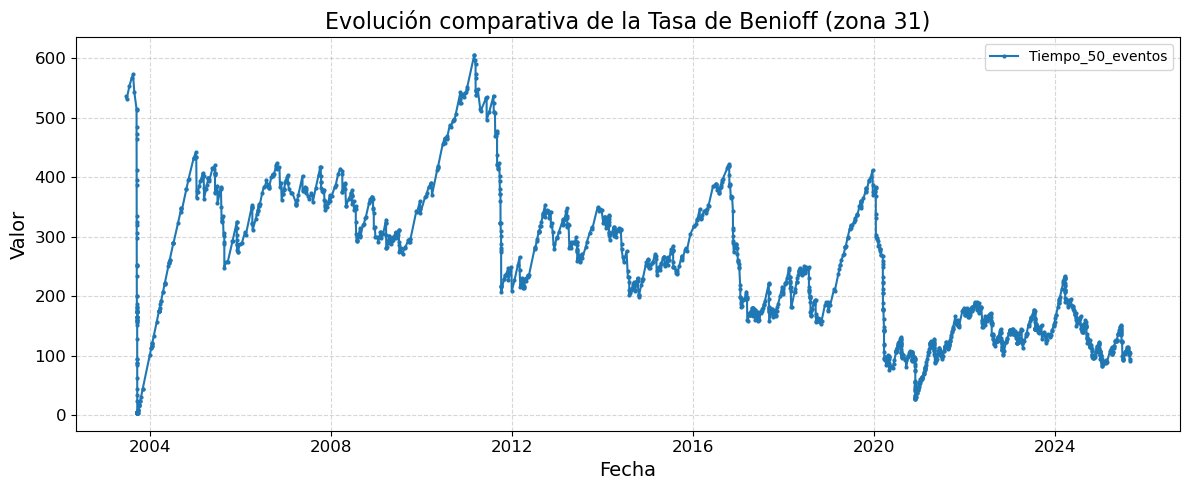

In [10]:
# Comparar evolución de Tiempo_50_eventos

filename = f"Evolución comparativa de la Tasa de Benioff (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_3, 
   fecha_col="FechaHora", 
   param_cols=["Tiempo_50_eventos"], 
   output_file=output_file,
   titulo=filename
       
)

### 4. Magnitud media en n eventos previos

In [11]:
gdf_2002_4 = par.magnitud_media_eventos_previos(
    gdf_2002_3,
    n=50,                     # mirar 50 eventos atrás
    col_mag="Mag_mbLgL",
    nueva_col="Mag_media_50"
)

gdf_2002_4[["FechaHora","Mag_mbLgL", "Mag_media_50"]].tail(15)

,FechaHora,Mag_mbLgL,Mag_media_50
141002,2025-08-05 12:10:08,1.4,1.566
141067,2025-08-08 13:54:13,1.9,1.556
141102,2025-08-10 21:08:44,2.2,1.570
141120,2025-08-11 21:38:43,1.2,1.584
141199,2025-08-16 22:31:57,1.4,1.574
141224,2025-08-18 01:30:09,1.2,1.580
141231,2025-08-18 04:52:32,1.5,1.570
141237,2025-08-18 08:23:04,1.7,1.572
141265,2025-08-20 02:30:24,1.3,1.568
141300,2025-08-21 17:55:12,1.9,1.562


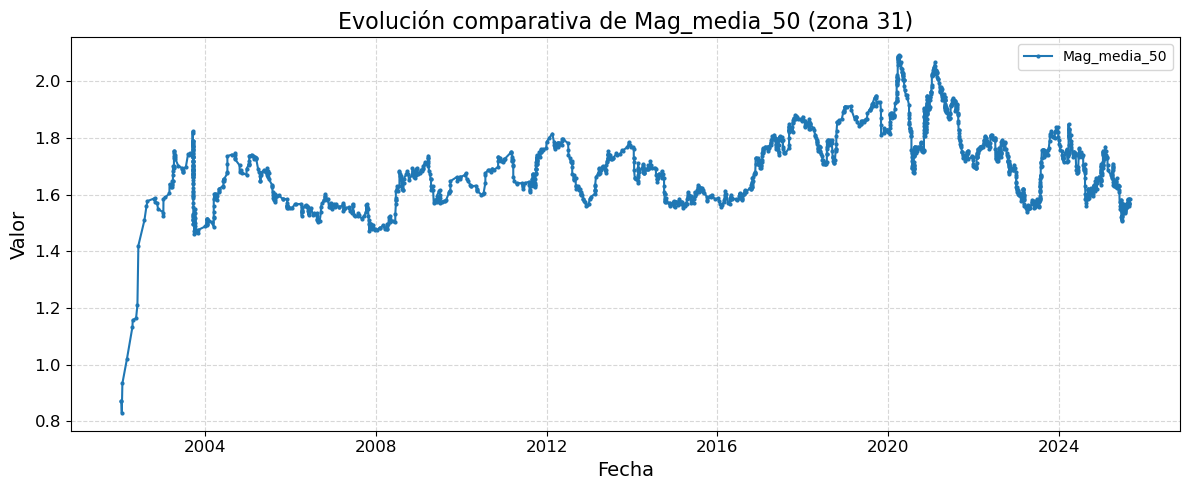

In [12]:
# Comparar evolución de Mag_media_50
filename = f"Evolución comparativa de Mag_media_50 (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_4, 
   fecha_col="FechaHora", 
   param_cols=["Mag_media_50"], 
   output_file=output_file,
   titulo=filename
   
)

### 5. Valor medio y desviación estándar de la magnitud en los últimos 30 días

In [13]:
gdf_2002_5 = par.estadisticas_magnitud_ventana(gdf_2002_4, fecha_col="FechaHora", mag_col="Mag_mbLgL", dias=30)

gdf_2002_5[["FechaHora", "Mag_mbLgL", "Mag_media_30d", "Mag_std_30d"]].tail(15)

,FechaHora,Mag_mbLgL,Mag_media_30d,Mag_std_30d
1915,2025-08-05 12:10:08,1.4,1.766667,0.364005
1916,2025-08-08 13:54:13,1.9,1.780000,0.345768
1917,2025-08-10 21:08:44,2.2,1.818182,0.351620
1918,2025-08-11 21:38:43,1.2,1.766667,0.379793
1919,2025-08-16 22:31:57,1.4,1.738462,0.377577
1920,2025-08-18 01:30:09,1.2,1.700000,0.390266
1921,2025-08-18 04:52:32,1.5,1.686667,0.379599
1922,2025-08-18 08:23:04,1.7,1.687500,0.366742
1923,2025-08-20 02:30:24,1.3,1.640000,0.373784
1924,2025-08-21 17:55:12,1.9,1.657143,0.381725


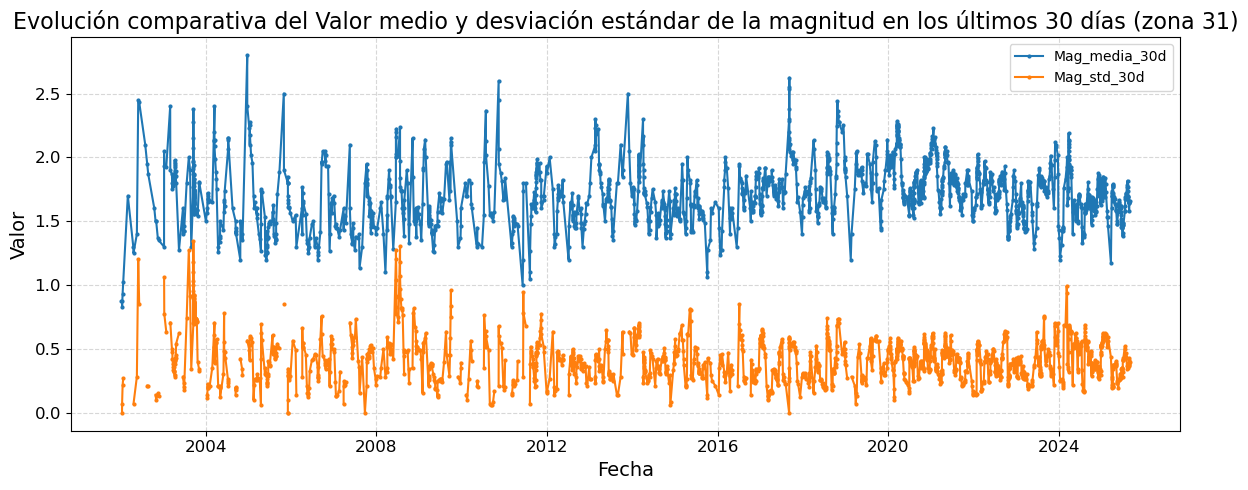

In [14]:
# Comparar evolución de Mag_media_30d y Mag_std_30d
filename = f"Evolución comparativa del Valor medio y desviación estándar de la magnitud en los últimos 30 días (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_5, 
   fecha_col="FechaHora", 
   param_cols=["Mag_media_30d","Mag_std_30d"], 
   output_file=output_file,
   titulo=filename
)

### 6a. Cambios en la tasa sísmica (z-value)

In [15]:
gdf_2002_6a = par.calcular_z_value_vectorizado(
    gdf_2002_5, fecha_col="FechaHora", T=30, col_out="z_30d_eventos"
)

gdf_2002_6a[["FechaHora", "z_30d_eventos"]].tail(20)

,FechaHora,z_30d_eventos
1910,2025-07-22 09:01:45,-0.552506
1911,2025-07-22 21:16:54,-0.552506
1912,2025-07-24 22:47:28,-1.094267
1913,2025-07-25 10:03:12,-0.817018
1914,2025-08-02 00:34:08,-2.145880
1915,2025-08-05 12:10:08,-1.841656
1916,2025-08-08 13:54:13,-1.993696
1917,2025-08-10 21:08:44,-1.693556
1918,2025-08-11 21:38:43,-1.400754
1919,2025-08-16 22:31:57,-0.791594


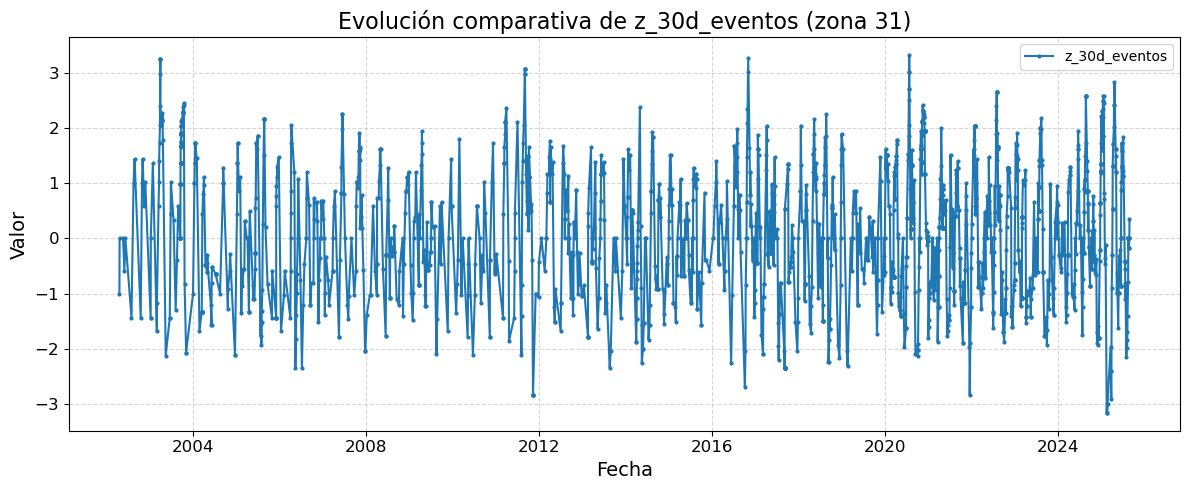

In [16]:
# Comparar evolución de z_30d_eventos
filename = f"Evolución comparativa de z_30d_eventos (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_6a, 
   fecha_col="FechaHora", 
   param_cols=["z_30d_eventos"], 
   output_file=output_file,
   titulo=filename
)

### 6b. Cambios en la tasa sísmica (beta-value)

In [17]:
gdf_2002_6b = par.calcular_beta_value(gdf_2002_6a, fecha_col="FechaHora", ventana_dias=30)

gdf_2002_6b[["FechaHora", "M_obs", "Beta_value"]].tail(15)


,FechaHora,M_obs,Beta_value
1915,2025-08-05 12:10:08,9.0,0.888078
1916,2025-08-08 13:54:13,10.0,1.274955
1917,2025-08-10 21:08:44,11.0,1.661832
1918,2025-08-11 21:38:43,12.0,2.048709
1919,2025-08-16 22:31:57,13.0,2.435586
1920,2025-08-18 01:30:09,14.0,2.822462
1921,2025-08-18 04:52:32,14.0,2.822462
1922,2025-08-18 08:23:04,14.0,2.822462
1923,2025-08-20 02:30:24,14.0,2.822462
1924,2025-08-21 17:55:12,13.0,2.435586


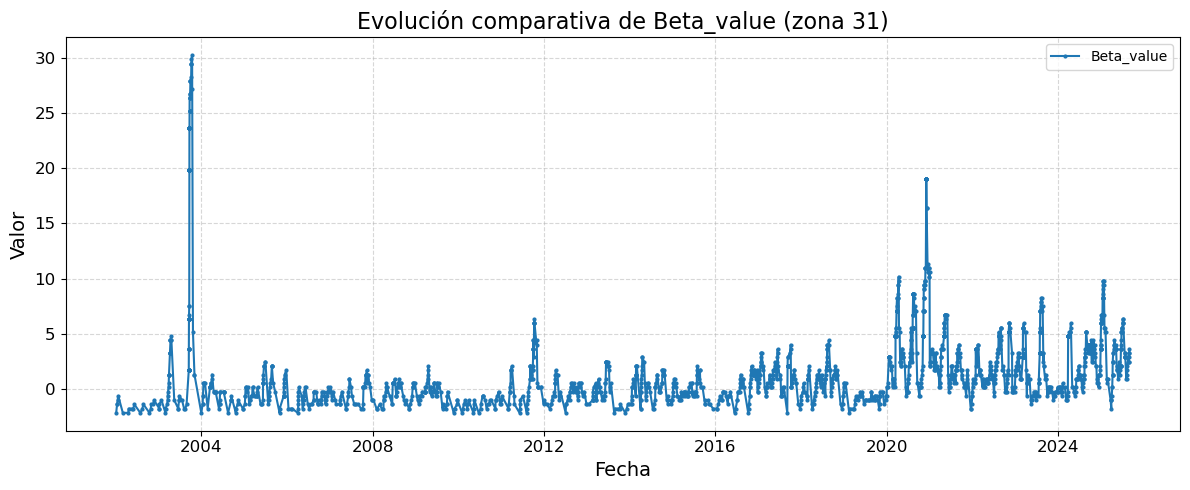

In [18]:
# Comparar evolución de Beta_value
filename = f"Evolución comparativa de Beta_value (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_6b, 
   fecha_col="FechaHora", 
   param_cols=["Beta_value"], 
   output_file=output_file,
   titulo=filename
)

### 7. Magnitud máxima en los T días previos

In [19]:
# Calcular magnitud máxima en ventanas de 30, 90 y 180 días
gdf_2002_7 = par.agregar_magnitud_max_multiventana(
    gdf_2002_6b,
    fecha_col="FechaHora",
    mag_col="Mag_mbLgL",
    ventanas=[30, 90, 180]
)

# Verificar las nuevas columnas
gdf_2002_7[["FechaHora", "MagMax_30d", "MagMax_90d", "MagMax_180d"]].tail()


,FechaHora,MagMax_30d,MagMax_90d,MagMax_180d
1925,2025-08-22 00:10:12,2.3,2.7,2.7
1926,2025-08-24 13:02:38,2.2,2.7,2.7
1927,2025-08-27 02:04:36,2.2,2.7,2.7
1928,2025-08-27 05:57:20,2.5,2.7,2.7
1929,2025-08-28 14:42:40,2.5,2.7,2.7


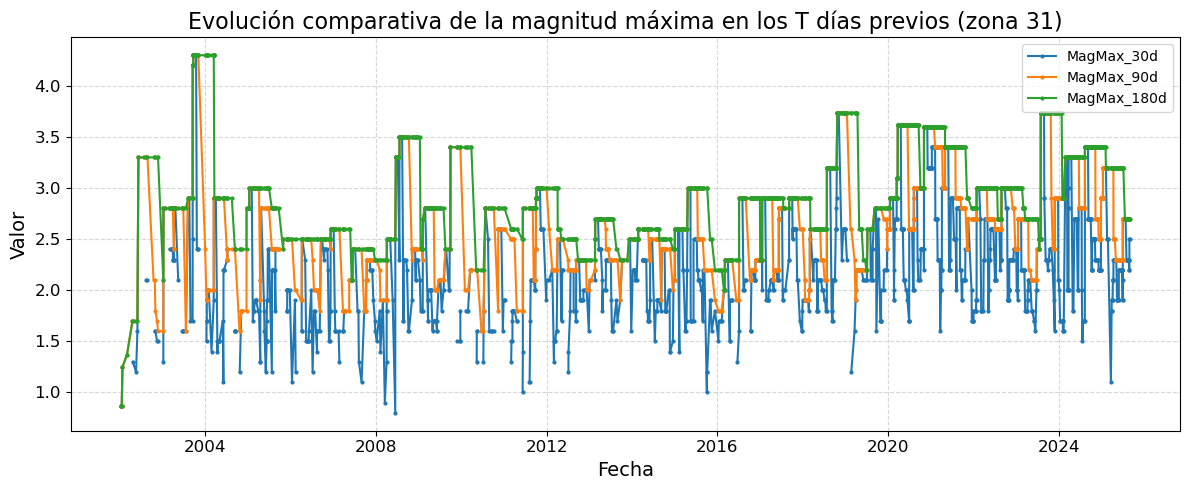

In [20]:
# Comparar evolución de la magnitud máxima en los T días previos

filename = f"Evolución comparativa de la magnitud máxima en los T días previos (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_7, 
   fecha_col="FechaHora", 
   param_cols=["MagMax_30d","MagMax_90d","MagMax_180d"], 
   output_file=output_file,
   titulo=filename
)

### 8. Profundidad media en los T días previos

In [21]:
# Calcular profundidad media en los últimos 30 días
gdf_2002_8 = par.agregar_profundidad_media_multiventana(gdf_2002_7, fecha_col="FechaHora", prof_col="Prof_Km", ventanas=[30])

# Verificar
gdf_2002_8[["FechaHora", "ProfMedia_30d"]].tail()


,FechaHora,ProfMedia_30d
1925,2025-08-22 00:10:12,8.230769
1926,2025-08-24 13:02:38,7.500000
1927,2025-08-27 02:04:36,6.923077
1928,2025-08-27 05:57:20,6.785714
1929,2025-08-28 14:42:40,6.933333


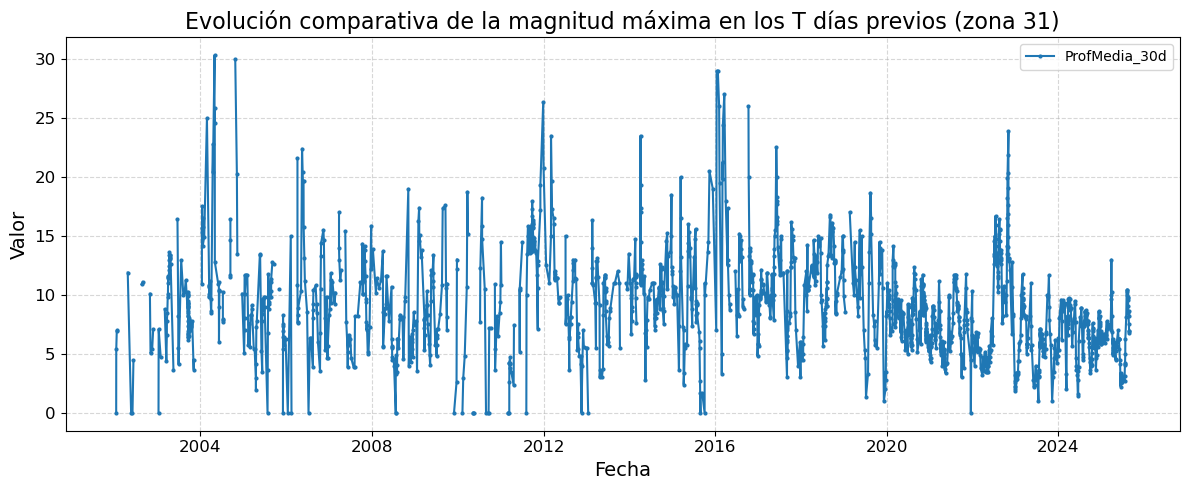

In [22]:
# Comparar evolución de la profundidad media en los T días previos
filename = f"Evolución comparativa de la magnitud máxima en los T días previos (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_8, 
   fecha_col="FechaHora", 
   param_cols=["ProfMedia_30d"], 
   output_file=output_file,
   titulo=filename
)

### 9. Tiempo desde el último terremoto

In [23]:
gdf_2002_9 = par.agregar_tiempo_desde_ultimo(gdf_2002_8, fecha_col="FechaHora", unidad="dias")

# Verificar
gdf_2002_9[["FechaHora", "TiempoDesdeUltimo"]].tail(15)


,FechaHora,TiempoDesdeUltimo
1915,2025-08-05 12:10:08,3.483333
1916,2025-08-08 13:54:13,3.072280
1917,2025-08-10 21:08:44,2.301748
1918,2025-08-11 21:38:43,1.020822
1919,2025-08-16 22:31:57,5.036968
1920,2025-08-18 01:30:09,1.123750
1921,2025-08-18 04:52:32,0.140544
1922,2025-08-18 08:23:04,0.146204
1923,2025-08-20 02:30:24,1.755093
1924,2025-08-21 17:55:12,1.642222


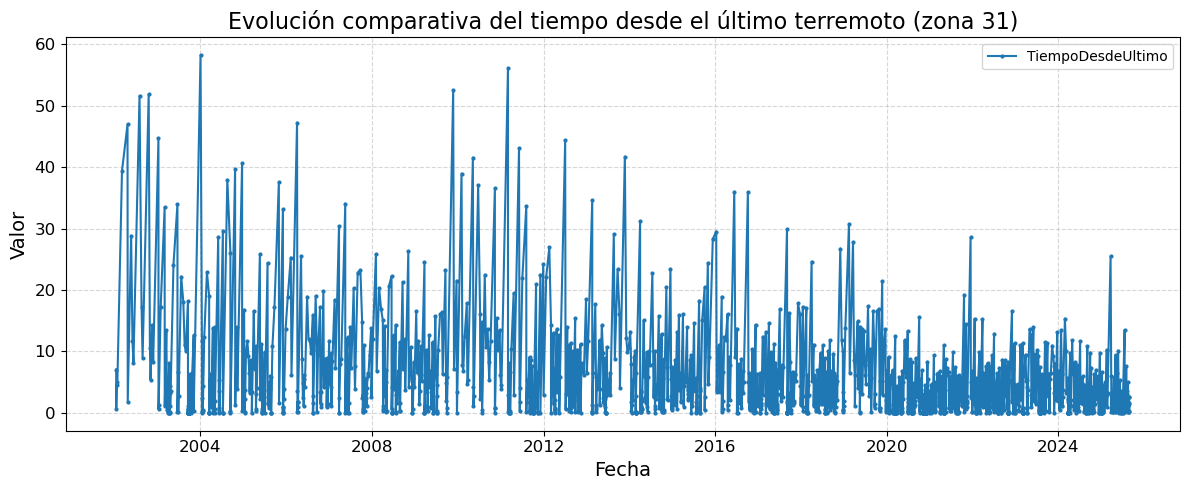

In [24]:
# Comparar evolución del tiempo desde el último terremoto 
filename = f"Evolución comparativa del tiempo desde el último terremoto (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_9, 
   fecha_col="FechaHora", 
   param_cols=["TiempoDesdeUltimo"], 
   output_file=output_file,
   titulo=filename
)

### 10. Tiempo transcurrido entre los últimos n eventos

In [25]:
# Calcular tiempo transcurrido entre el primer y último de los 5 eventos previos
gdf_2002_10 = par.agregar_tiempo_ventana_eventos_vector(gdf_2002_9, fecha_col="FechaHora", n_eventos=5, unidad="dias")

# Verificar
gdf_2002_10[["FechaHora", "TiempoVentana_5Eventos"]].tail(10)

/Volumes/Juanjo_4TB/Disco_4T/Master_Inteligencia_Artificial/Curso_2024_25/01_Python_para_Inteligencia_Artificial/Estudio/TFM/src/parametros_sismicos.py:883: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ts = df[fecha_col].view("int64") / 1e9  # nanosegundos a segundos


,FechaHora,TiempoVentana_5Eventos
1920,2025-08-18 01:30:09,9.483287
1921,2025-08-18 04:52:32,7.322083
1922,2025-08-18 08:23:04,6.447465
1923,2025-08-20 02:30:24,3.165590
1924,2025-08-21 17:55:12,3.684063
1925,2025-08-22 00:10:12,3.803935
1926,2025-08-24 13:02:38,6.194144
1927,2025-08-27 02:04:36,6.982083
1928,2025-08-27 05:57:20,5.501481
1929,2025-08-28 14:42:40,6.605880


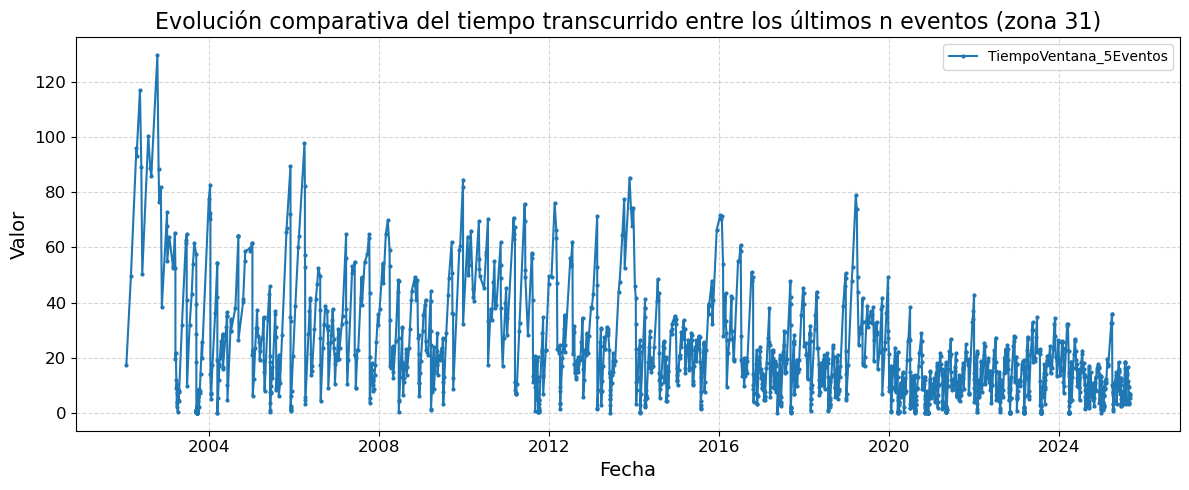

In [26]:
# Comparar evolución del tiempo transcurrido entre los últimos n eventos
filename = f"Evolución comparativa del tiempo transcurrido entre los últimos n eventos (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_10, 
   fecha_col="FechaHora", 
   param_cols=["TiempoVentana_5Eventos"], 
   output_file=output_file,
   titulo=filename
)

### 11. Tiempo medio entre eventos

In [27]:
# Calcular tiempo medio entre eventos de los últimos 5 eventos
gdf_2002_11 = par.agregar_tiempo_medio_ventana_eventos(gdf_2002_10, fecha_col="FechaHora", n_eventos=5, unidad="dias")

# Verificar
gdf_2002_11[["FechaHora", "TiempoMedio_5Eventos"]].tail(10)


/Volumes/Juanjo_4TB/Disco_4T/Master_Inteligencia_Artificial/Curso_2024_25/01_Python_para_Inteligencia_Artificial/Estudio/TFM/src/parametros_sismicos.py:947: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ts = df[fecha_col].view("int64") / 1e9  # nanosegundos a segundos


,FechaHora,TiempoMedio_5Eventos
1920,2025-08-18 01:30:09,2.370822
1921,2025-08-18 04:52:32,1.830521
1922,2025-08-18 08:23:04,1.611866
1923,2025-08-20 02:30:24,0.791398
1924,2025-08-21 17:55:12,0.921016
1925,2025-08-22 00:10:12,0.950984
1926,2025-08-24 13:02:38,1.548536
1927,2025-08-27 02:04:36,1.745521
1928,2025-08-27 05:57:20,1.375370
1929,2025-08-28 14:42:40,1.651470


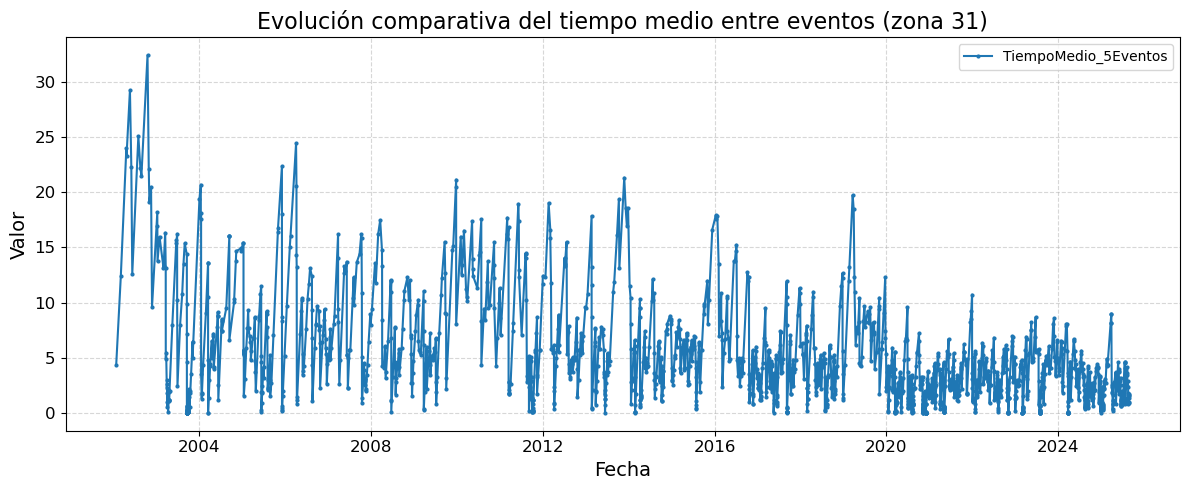

In [28]:
# Comparar evolución del tiempo medio entre eventos
filename = f"Evolución comparativa del tiempo medio entre eventos (zona {zona})"
output_file=ruta+"/figuras/"+filename


gra.plot_evolucion_multi(
   gdf_2002_11, 
   fecha_col="FechaHora", 
   param_cols=["TiempoMedio_5Eventos"], 
   output_file=output_file,
   titulo=filename
)

### 12. Coeficiente de variación

In [29]:
# Calcular coeficiente de variación para ventanas de 5 eventos
gdf_2002_12 = par.agregar_coeficiente_variacion(gdf_2002_11, fecha_col="FechaHora", n_eventos=50)

# Verificar
gdf_2002_12[["FechaHora", "CoefVar_50Eventos"]].tail(10)


/Volumes/Juanjo_4TB/Disco_4T/Master_Inteligencia_Artificial/Curso_2024_25/01_Python_para_Inteligencia_Artificial/Estudio/TFM/src/parametros_sismicos.py:1011: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ts = df[fecha_col].view("int64") / 1e9  # nanosegundos a segundos


,FechaHora,CoefVar_50Eventos
1920,2025-08-18 01:30:09,1.217098
1921,2025-08-18 04:52:32,1.245671
1922,2025-08-18 08:23:04,1.244463
1923,2025-08-20 02:30:24,1.236315
1924,2025-08-21 17:55:12,1.258989
1925,2025-08-22 00:10:12,1.265704
1926,2025-08-24 13:02:38,1.247329
1927,2025-08-27 02:04:36,1.201363
1928,2025-08-27 05:57:20,1.245958
1929,2025-08-28 14:42:40,1.219813


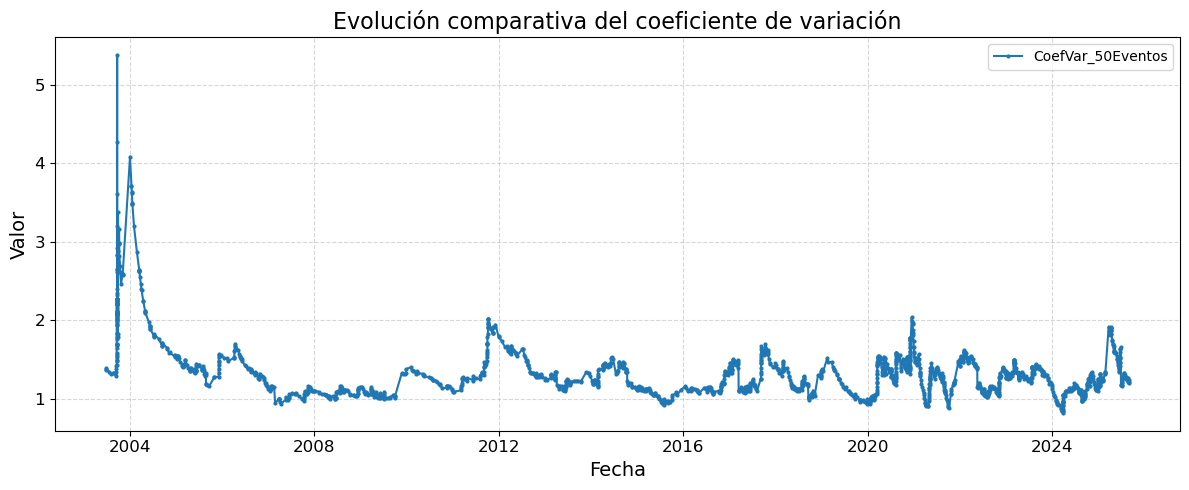

In [30]:
# Comparar evolución del coeficiente de variación
gra.plot_evolucion_multi(
   gdf_2002_12, 
   fecha_col="FechaHora", 
   param_cols=["CoefVar_50Eventos"], 
   titulo="Evolución comparativa del coeficiente de variación",
   
)

### 13. Número de terremotos en los últimos 30 días

In [31]:
# Contar eventos ocurridos en los últimos 30 días
gdf_2002_13 = par.contar_eventos_ultimos_T_dias(gdf_2002_12, fecha_col="FechaHora", T=30)

# Verificar
gdf_2002_13[["FechaHora", "NumEventosUltimos_30dias"]].tail(15)


,FechaHora,NumEventosUltimos_30dias
1915,2025-08-05 12:10:08,9.0
1916,2025-08-08 13:54:13,10.0
1917,2025-08-10 21:08:44,11.0
1918,2025-08-11 21:38:43,12.0
1919,2025-08-16 22:31:57,13.0
1920,2025-08-18 01:30:09,14.0
1921,2025-08-18 04:52:32,15.0
1922,2025-08-18 08:23:04,16.0
1923,2025-08-20 02:30:24,15.0
1924,2025-08-21 17:55:12,14.0


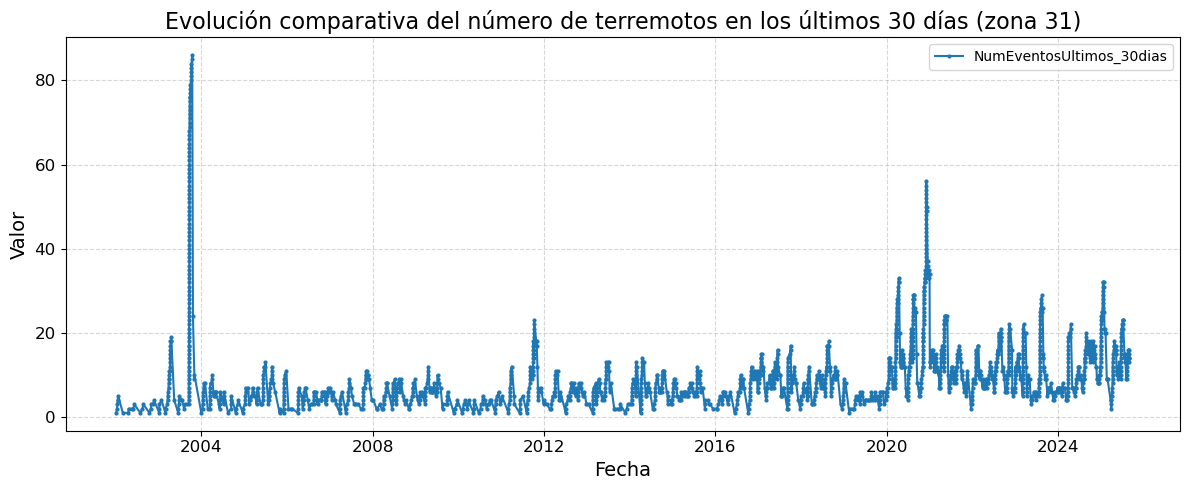

In [32]:
# Comparar evolución del número de terremotos en los últimos 30 días
filename = f"Evolución comparativa del número de terremotos en los últimos 30 días (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_13, 
   fecha_col="FechaHora", 
   param_cols=["NumEventosUltimos_30dias"], 
   output_file=output_file,
   titulo=filename
)

## CARACTERÍSTICAS PARAMÉTRICAS

### 1. Probabilidad de ocurrencia de un terremoto

In [33]:
# Cálculo de la magnitud de completitud
mc_opt = uti.estimar_mc_optimo(gdf_2002_13, col_mag="Mag_mbLgL", bins=0.1, threshold=0.9)

print('Magnitud de completitud: ', mc_opt)

Magnitud de completitud:  1.5999999999999996


In [34]:

# Cálculo de la probabilidad de ocurrencia de un terremoto para varias magnitudes

gdf_2002_14 = par.agregar_prob_ocurrencia(gdf_2002_13, ["b_lsq", "b_mlk"], M_list=[3.5, 4.0, 4.5], Mmin=mc_opt)

# Verificar
gdf_2002_14[["FechaHora", "b_lsq_prob_M3.5","b_lsq_prob_M4.0","b_lsq_prob_M4.5","b_mlk_prob_M3.5","b_mlk_prob_M4.0","b_mlk_prob_M4.5"]].tail(15)
#gdf_2002_14.tail(15)

,FechaHora,b_lsq_prob_M3.5,b_lsq_prob_M4.0,b_lsq_prob_M4.5,b_mlk_prob_M3.5,b_mlk_prob_M4.0,b_mlk_prob_M4.5
1915,2025-08-05 12:10:08,0.015540,0.005194,0.001736,0.083708,0.043580,0.022688
1916,2025-08-08 13:54:13,0.014321,0.004685,0.001533,0.081006,0.041811,0.021580
1917,2025-08-10 21:08:44,0.014991,0.004964,0.001643,0.084794,0.044295,0.023139
1918,2025-08-11 21:38:43,0.017575,0.006068,0.002095,0.088614,0.046830,0.024749
1919,2025-08-16 22:31:57,0.017839,0.006183,0.002143,0.085882,0.045014,0.023594
1920,2025-08-18 01:30:09,0.016781,0.005724,0.001952,0.087519,0.046101,0.024284
1921,2025-08-18 04:52:32,0.017048,0.005839,0.002000,0.084794,0.044295,0.023139
1922,2025-08-18 08:23:04,0.017121,0.005870,0.002013,0.085338,0.044654,0.023366
1923,2025-08-20 02:30:24,0.016226,0.005486,0.001855,0.084251,0.043937,0.022913
1924,2025-08-21 17:55:12,0.016388,0.005555,0.001883,0.082625,0.042869,0.022242


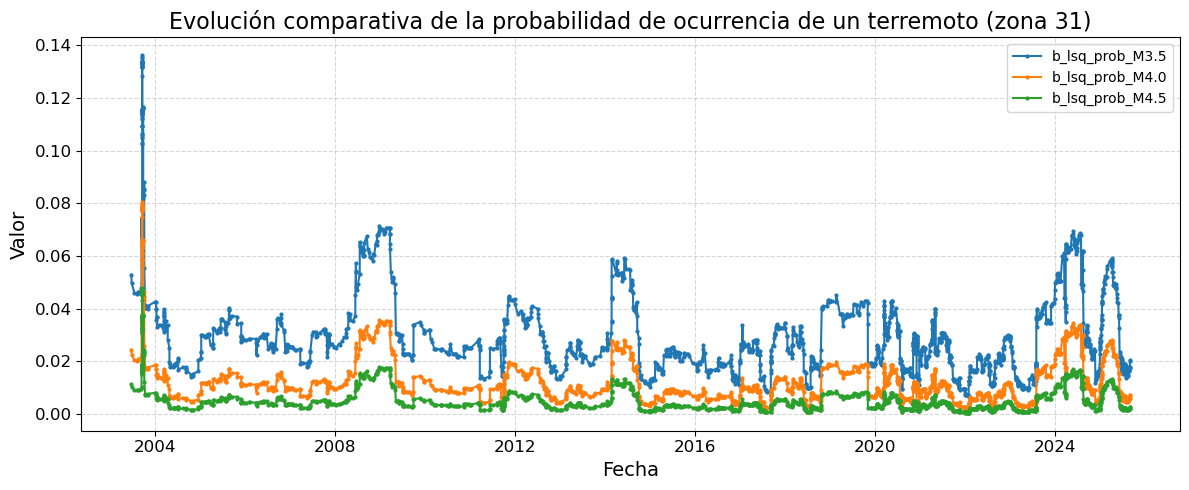

In [35]:
# Comparar evolución de la probabilidad de ocurrencia de un terremoto
filename = f"Evolución comparativa de la probabilidad de ocurrencia de un terremoto (zona {zona})"
output_file=ruta+"/figuras/"+filename


gra.plot_evolucion_multi(
   gdf_2002_14, 
   fecha_col="FechaHora", 
   param_cols=["b_lsq_prob_M3.5","b_lsq_prob_M4.0","b_lsq_prob_M4.5"], 
   output_file=output_file,
   titulo=filename
)

### 2. Desviación de la Ley de Gutenberg-Richer
### a) Utiliza una ventana de T dias previos al evento seleccionado

In [36]:
gdf_2002_15 = par.eta_numba_vector(
    gdf_2002_14,
    fecha_col="FechaHora",
    col_mag="Mag_mbLgL",
    a_lsq="a_lsq",
    b_lsq="b_lsq",
    a_mlk="a_mlk",
    b_mlk="b_mlk",
    dias=30
)

gdf_2002_15[["FechaHora", "eta_T_lsq", "eta_T_mlk"]].tail()

,FechaHora,eta_T_lsq,eta_T_mlk
1925,2025-08-22 00:10:12,0.694300,0.494398
1926,2025-08-24 13:02:38,0.761478,0.543100
1927,2025-08-27 02:04:36,0.732230,0.512783
1928,2025-08-27 05:57:20,0.683920,0.484609
1929,2025-08-28 14:42:40,0.644779,0.456788


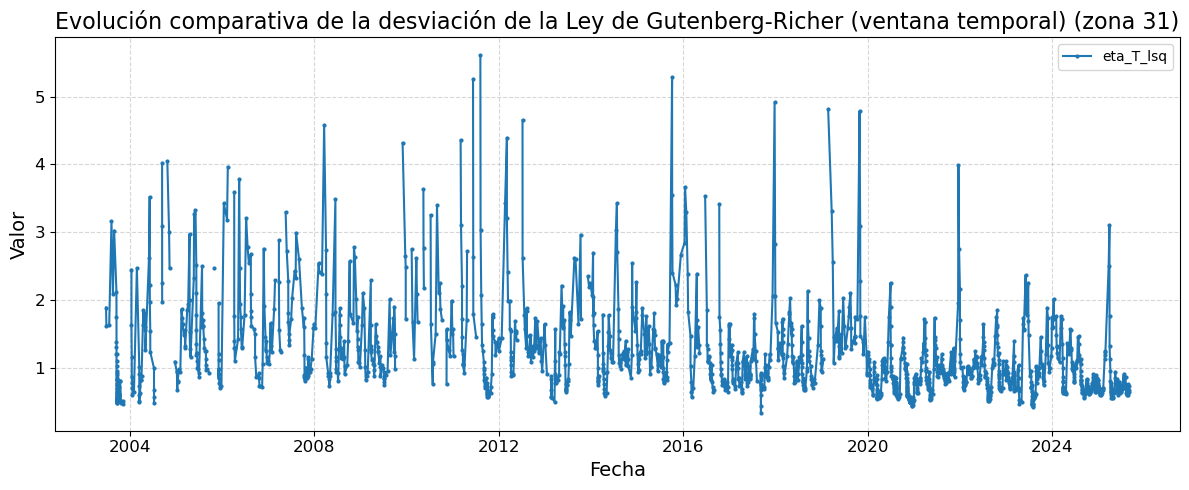

In [37]:
# Comparar evolución de la desviación de la Ley de Gutenberg-Richer (ventana temporal)
  
filename = f"Evolución comparativa de la desviación de la Ley de Gutenberg-Richer (ventana temporal) (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_15, 
   fecha_col="FechaHora", 
   param_cols=["eta_T_lsq"], 
   output_file=output_file,
   titulo=filename
)

### b) Utiliza una ventana de N eventos previos al evento seleccionado

In [38]:
gdf_2002_16 = par.eta_ventana_eventos(
    gdf_2002_15, 
    col_mag="Mag_mbLgL",
    a_lsq="a_lsq",
    b_lsq="b_lsq",
    a_mlk="a_mlk",
    b_mlk="b_mlk",
    n_eventos=50
)

gdf_2002_16[["FechaHora","eta_N_lsq", "eta_N_mlk"]].tail()

,FechaHora,eta_N_lsq,eta_N_mlk
1925,2025-08-22 00:10:12,8.550194,2.845359
1926,2025-08-24 13:02:38,8.598995,2.858275
1927,2025-08-27 02:04:36,8.638803,2.866560
1928,2025-08-27 05:57:20,8.861221,2.959722
1929,2025-08-28 14:42:40,8.935098,2.985940


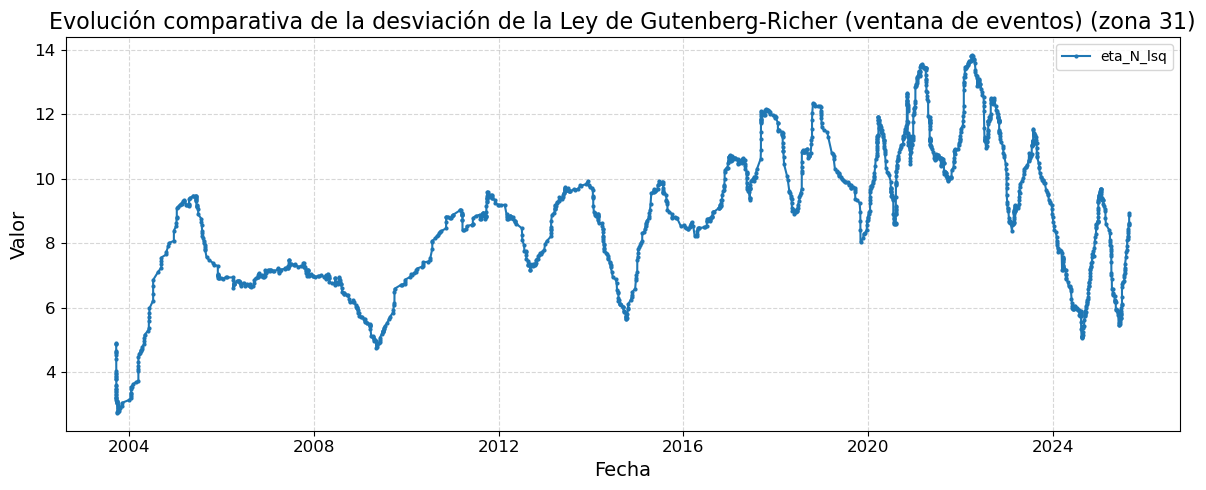

In [39]:
# Comparar evolución de la desviación de la Ley de Gutenberg-Richer (ventana de eventos)

filename = f"Evolución comparativa de la desviación de la Ley de Gutenberg-Richer (ventana de eventos) (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_16, 
   fecha_col="FechaHora", 
   param_cols=["eta_N_lsq"], 
   output_file=output_file,
   titulo=filename
)

### 3. Desviación estándar del parámetro b

### a) Utiliza una ventana de T dias previos al evento seleccionado

In [40]:
# Por ventana de días
gdf_2002_17 = par.agregar_sigma_b_tiempo(gdf_2002_16, fecha_col="FechaHora", col_mag="Mag_mbLgL",
                                b_lsq="b_lsq", b_mlk="b_mlk", dias=30)

gdf_2002_17.tail()[["FechaHora", "sigma_b_lsq_30d", "sigma_b_mlk_30d"]]


,FechaHora,sigma_b_lsq_30d,sigma_b_mlk_30d
1925,2025-08-22 00:10:12,0.203119,0.075440
1926,2025-08-24 13:02:38,0.197425,0.073325
1927,2025-08-27 02:04:36,0.222410,0.084005
1928,2025-08-27 05:57:20,0.195472,0.075408
1929,2025-08-28 14:42:40,0.182890,0.070474


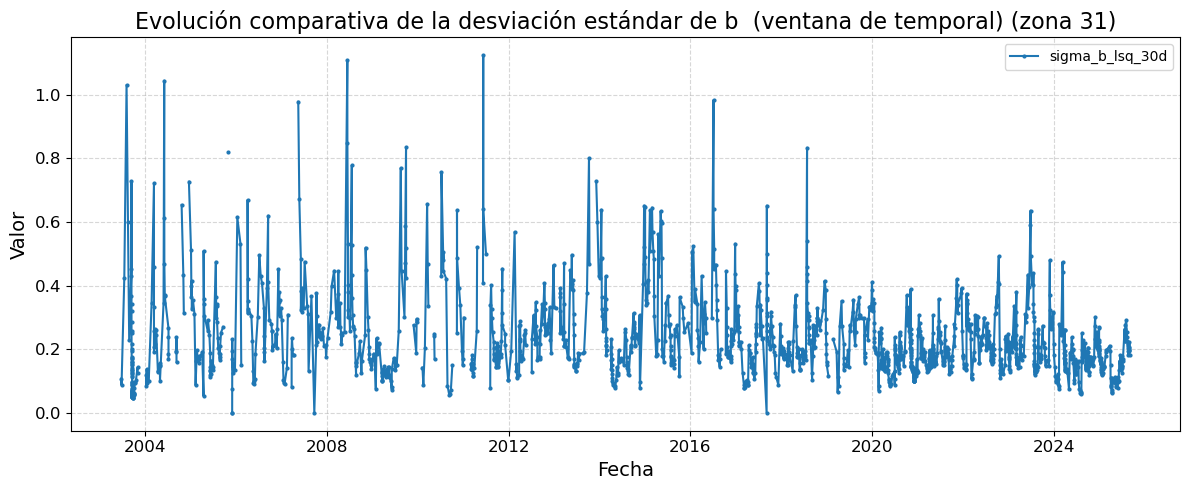

In [41]:
# Comparar evolución de la desviación estándar de b  (ventana de temporal)
filename = f"Evolución comparativa de la desviación estándar de b  (ventana de temporal) (zona {zona})"
output_file=ruta+"/figuras/"+filename


gra.plot_evolucion_multi(
   gdf_2002_17,
   fecha_col="FechaHora", 
   param_cols=["sigma_b_lsq_30d"], 
   output_file=output_file,
   titulo=filename
)

### b) Utiliza una ventana de N eventos previos al evento seleccionado

In [42]:
# Por número de eventos
gdf_2002_18 = par.agregar_sigma_b_eventos(gdf_2002_17, col_mag="Mag_mbLgL", b_lsq="b_lsq", b_mlk="b_mlk", n_eventos=50)

gdf_2002_18.tail()[["FechaHora", "sigma_b_lsq_50ev", "sigma_b_mlk_50ev"]]
#gdf_2002_18.tail()

,FechaHora,sigma_b_lsq_50ev,sigma_b_mlk_50ev
1925,2025-08-22 00:10:12,0.107276,0.039843
1926,2025-08-24 13:02:38,0.107771,0.040027
1927,2025-08-27 02:04:36,0.112978,0.042672
1928,2025-08-27 05:57:20,0.106357,0.041030
1929,2025-08-28 14:42:40,0.103776,0.039989


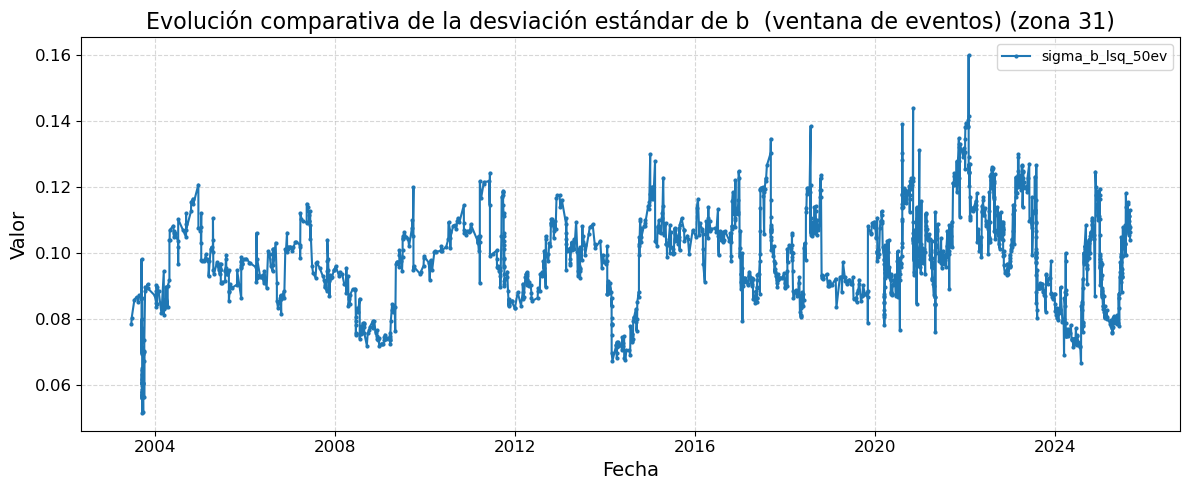

In [43]:
# Comparar evolución de la desviación estándar de b  (ventana de eventos)

filename = f"Evolución comparativa de la desviación estándar de b  (ventana de eventos) (zona {zona})"
output_file=ruta+"/figuras/"+filename


gra.plot_evolucion_multi(
   gdf_2002_18, 
   fecha_col="FechaHora", 
   param_cols=["sigma_b_lsq_50ev"], 
   output_file=output_file,
   titulo=filename
)

### 4. Déficit de magnitud

### a) Utiliza el evento actual

In [44]:
gdf_2002_19 = par.agregar_deficit_evento(gdf_2002_18, col_mag="Mag_mbLgL")

gdf_2002_19.tail()[["FechaHora", "Mdef_evento_lsq", "Mdef_evento_mlk"]]


,FechaHora,Mdef_evento_lsq,Mdef_evento_mlk
1925,2025-08-22 00:10:12,-1.714885,-2.520082
1926,2025-08-24 13:02:38,-1.714885,-2.520082
1927,2025-08-27 02:04:36,-0.515533,-1.304434
1928,2025-08-27 05:57:20,-1.272353,-2.067026
1929,2025-08-28 14:42:40,-1.276253,-2.074850


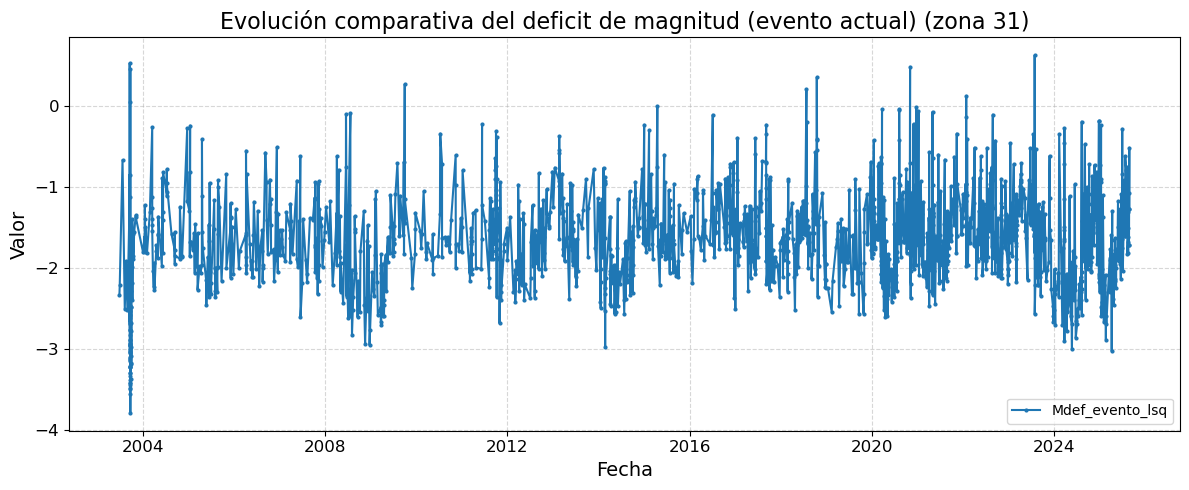

In [45]:
# Comparar evolución del deficit de magnitud (evento actual)

filename = f"Evolución comparativa del deficit de magnitud (evento actual) (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_19, 
   fecha_col="FechaHora", 
   param_cols=["Mdef_evento_lsq"], 
   output_file=output_file,
   titulo=filename
)

### b) Utiliza una ventana de T días previos al evento seleccionado

In [46]:
gdf_2002_20 = par.agregar_deficit_ventana_tiempo(gdf_2002_19, col_mag="Mag_mbLgL", fecha_col="FechaHora", T=180)

gdf_2002_20.tail()[["Mdef_Tdias_lsq","Mdef_Tdias_mlk"]]

,Mdef_Tdias_lsq,Mdef_Tdias_mlk
1925,-0.314885,-1.120082
1926,-0.314885,-1.120082
1927,-0.315533,-1.104434
1928,-0.372353,-1.167026
1929,-0.376253,-1.174850


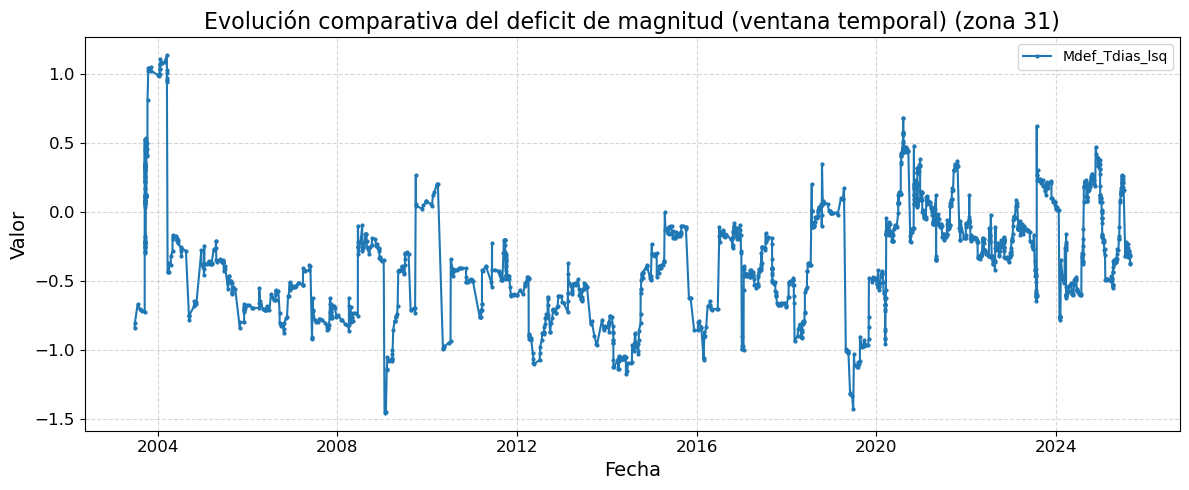

In [47]:
# Comparar evolución del deficit de magnitud (ventana temporal)

filename = f"Evolución comparativa del deficit de magnitud (ventana temporal) (zona {zona})"
output_file=ruta+"/figuras/"+filename


gra.plot_evolucion_multi(
   gdf_2002_20, 
   fecha_col="FechaHora", 
   param_cols=["Mdef_Tdias_lsq"], 
   output_file=output_file,
   titulo=filename
)

### c) Utiliza una ventana de N eventos previos al evento seleccionado

In [48]:
gdf_2002_21 = par.agregar_deficit_ventana_eventos(gdf_2002_20, col_mag="Mag_mbLgL", fecha_col="FechaHora", n_eventos=100)
gdf_2002_21.tail()[["Mdef_Neventos_lsq","Mdef_Neventos_mlk"]]

,Mdef_Neventos_lsq,Mdef_Neventos_mlk
1925,0.185115,-0.620082
1926,0.185115,-0.620082
1927,0.184467,-0.604434
1928,0.127647,-0.667026
1929,0.123747,-0.674850


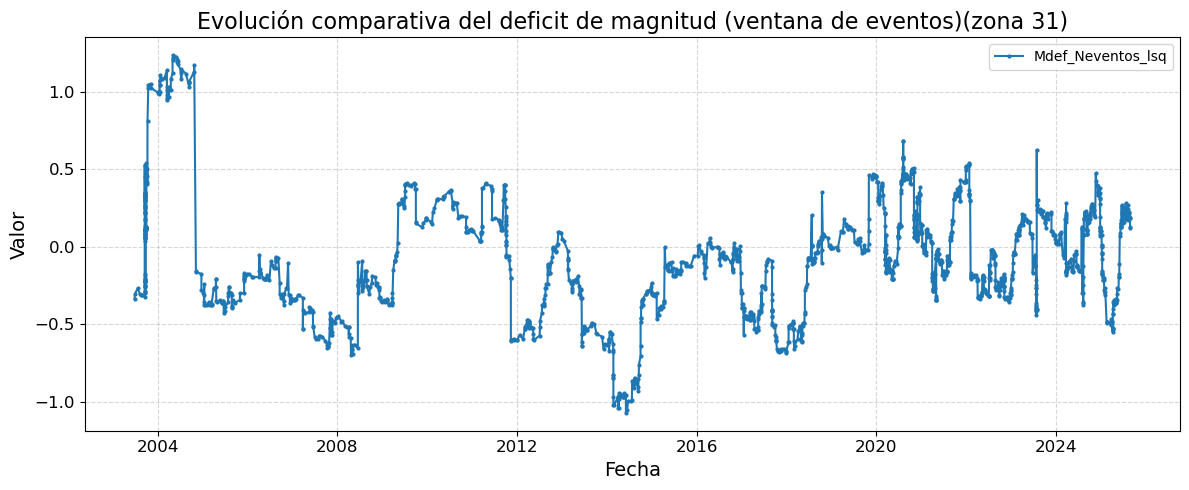

In [49]:
# Comparar evolución del deficit de magnitud (ventana de eventos)

filename = f"Evolución comparativa del deficit de magnitud (ventana de eventos)(zona {zona})"
output_file=ruta+"/figuras/"+filename


gra.plot_evolucion_multi(
   gdf_2002_21, 
   fecha_col="FechaHora", 
   param_cols=["Mdef_Neventos_lsq"], 
   output_file=output_file,
   titulo=filename
)

### 5. Tiempo de recurrencia total

La magnitud va desde 3.5 a 5.5 en intervalos de 0.1
a y b pueden tomar dos valores diferentes

In [50]:
gdf_2002_22 = par.agregar_tiempo_recurrencia(gdf_2002_21, fecha_col="FechaHora", Mmin=3.5, Mmax=5.5, step=0.1, unidad="años")

# Ver columnas nuevas
print(gdf_2002_22.filter(like="Trec_").tail())

      Trec_M3.5_lsq  Trec_M3.6_lsq  Trec_M3.7_lsq  Trec_M3.8_lsq  \
1925      66.294212      81.994414     101.412835     125.430046   
1926      66.294212      81.994414     101.412835     125.430046   
1927      65.984697      81.556017     100.801916     124.589535   
1928      56.895364      69.865652      85.792744     105.350694   
1929      56.344591      69.161251      84.893307     104.203922   

      Trec_M3.9_lsq  Trec_M4.0_lsq  Trec_M4.1_lsq  Trec_M4.2_lsq  \
1925     155.135159     191.875220     237.316288     293.518989   
1926     155.135159     191.875220     237.316288     293.518989   
1927     153.990647     190.329945     235.244729     290.758674   
1928     129.367219     158.858728     195.073341     239.543705   
1929     127.907108     157.002038     192.715170     236.551941   

      Trec_M4.3_lsq  Trec_M4.4_lsq  ...  Trec_M4.6_mlk  Trec_M4.7_mlk  \
1925     363.031959     449.007417  ...      64.926361      73.905512   
1926     363.031959     449.007417  

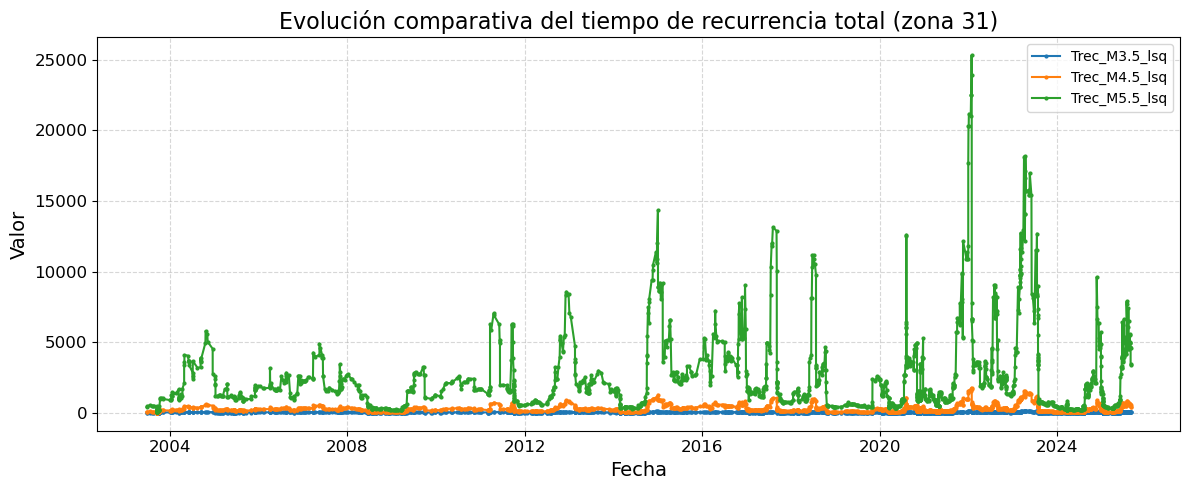

In [51]:
# Compar
filename = f"Evolución comparativa del tiempo de recurrencia total (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_22, 
   fecha_col="FechaHora", 
   param_cols=["Trec_M3.5_lsq","Trec_M4.5_lsq","Trec_M5.5_lsq"], 
   output_file=output_file,
   titulo=filename

)

### 6. Incremento del valor b

In [52]:

gdf_2002_23 = par.agregar_incrementos_b(gdf_2002_22, col_b1="b_lsq", col_b2="b_mlk")

# Ver las nuevas columnas

gdf_2002_23.filter(like="db_").tail()

,db_lsq_0_2,db_lsq_2_4,db_lsq_4_6,db_lsq_6_8,db_lsq_8_10,db_lsq_0_4,db_lsq_4_8,db_lsq_8_12,db_lsq_12_16,db_lsq_16_20,db_mlk_0_2,db_mlk_2_4,db_mlk_4_6,db_mlk_6_8,db_mlk_8_10,db_mlk_0_4,db_mlk_4_8,db_mlk_8_12,db_mlk_12_16,db_mlk_16_20
1925,-0.018904,0.011290,0.010372,-0.039759,0.008220,-0.007614,-0.029387,-0.016171,0.065954,0.005306,-0.002930,0.001469,0.002915,-0.002915,-0.002945,-1.461189e-03,0.000000,-0.010445,0.059897,0.014228
1926,-0.016641,0.010001,-0.004574,0.010556,-0.046794,-0.006639,0.005982,-0.014845,0.008587,0.022941,-0.007383,0.007383,0.005770,0.002841,-0.020517,0.000000e+00,0.008611,-0.011541,0.044751,0.018081
1927,-0.002959,-0.018904,0.011290,0.010372,-0.039759,-0.021863,0.021662,-0.031539,0.038787,0.007672,0.002930,-0.002930,0.001469,0.002915,-0.002915,2.220446e-16,0.004384,-0.005860,0.049947,0.003667
1928,-0.031218,-0.016641,0.010001,-0.004574,0.010556,-0.047859,0.005427,-0.036238,-0.007319,0.072448,-0.008611,-0.007383,0.007383,0.005770,0.002841,-1.599322e-02,0.013152,-0.017676,-0.001524,0.062637
1929,-0.030022,-0.002959,-0.018904,0.011290,0.010372,-0.032980,-0.007614,-0.029387,-0.016171,0.065954,-0.012950,0.002930,-0.002930,0.001469,0.002915,-1.002011e-02,-0.001461,0.000000,-0.010445,0.059897


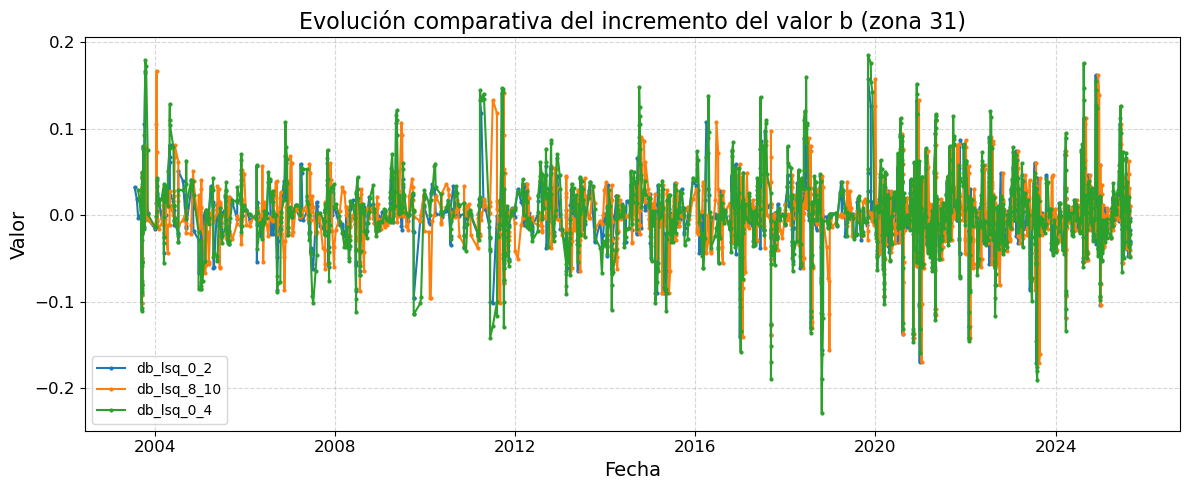

In [53]:
# Comparar evolución del incremento del valor b

filename = f"Evolución comparativa del incremento del valor b (zona {zona})"
output_file=ruta+"/figuras/"+filename


gra.plot_evolucion_multi(
   gdf_2002_23, 
   fecha_col="FechaHora", 
   param_cols=["db_lsq_0_2","db_lsq_8_10","db_lsq_0_4"], 
   output_file=output_file,
   titulo=filename

)

### 7. Coeficiente de agrupación

In [54]:


gdf_2002_24 = par.calcular_ccluster_aprox(
    gdf_2002_23,
    fecha_col="FechaHora",
    lat_col="Latitud",
    lon_col="Longitud",
    Tp_dias=30,
    eps_km=50,
    chunk_size=5000
 )

gdf_2002_24[["FechaHora", "Ccluster"]].tail()

Ccluster chunks:   0%|          | 0/1 [00:00<?, ?it/s]

Ccluster chunks: 100%|██████████| 1/1 [00:00<00:00,  7.70it/s]

Ccluster chunks: 100%|██████████| 1/1 [00:00<00:00,  7.68it/s]

,FechaHora,Ccluster
1925,2025-08-22 00:10:12,0.679456
1926,2025-08-24 13:02:38,0.712217
1927,2025-08-27 02:04:36,0.702068
1928,2025-08-27 05:57:20,0.691473
1929,2025-08-28 14:42:40,0.681405


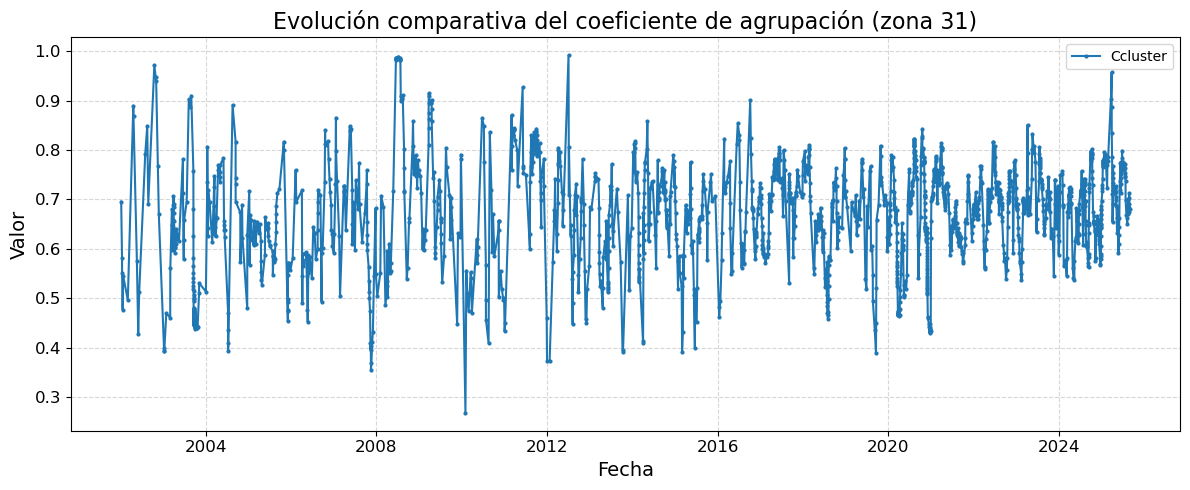

In [55]:
# Comparar evolución del coeficiente de agrupación

filename = f"Evolución comparativa del coeficiente de agrupación (zona {zona})"
output_file=ruta+"/figuras/"+filename


gra.plot_evolucion_multi(
   gdf_2002_24, 
   fecha_col="FechaHora", 
   param_cols=["Ccluster"], 
   output_file=output_file,
   titulo=filename
)

## GUARDA DATAFRAME  

In [56]:
# Guardar

filename = f"Dataframe_caracteristicas_entrada_zona_{zona}.pkl"
output_file=ruta+"/pkl_files/"+filename
   
    
gdf_2002_24.to_pickle(output_file)
print(f"Guardado {filename} con {len(gdf_2002_24)} filas")


Guardado Dataframe_caracteristicas_entrada_zona_31.pkl con 1930 filas
